Ref
- https://youtu.be/DGEqDF5_rt8

In [131]:
######################################
# Importando as libraries
######################################

import pandas as pd
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt



In [69]:
df_ref = pd.read_excel('https://downloads.brentozar.com/2020_Data_Professional_Salary_Survey_Responses.xlsx',
                   sheet_name='Salary Survey', header=3)
print(df_ref.shape)
df_ref.head()

(8627, 31)


,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2020,2020-01-04 18:50:34.328,115000.0,United States,03,Microsoft SQL Server,15,"Microsoft SQL Server, MongoDB, Azure SQL DB (a...",Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2016,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2020,2020-01-04 10:43:01.821,100000.0,United States,NaN,Other,6,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",...,informix,informix,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1
2,2020,2020-01-04 09:51:45.885,100000.0,Spain,28046,Microsoft SQL Server,2,MySQL/MariaDB,Full time employee,Other,...,SQL Server 2017,SQL Server 2017,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2020,2020-01-04 01:08:53.605,70000.0,United States,94133,Microsoft SQL Server,3,Microsoft Access,Full time employee,Analyst,...,SQL Server 2016,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked,Not Asked,1
4,2020,2020-01-03 15:28:54.163,110000.0,United States,95354,Oracle,30,"Microsoft SQL Server, Oracle, MySQL/MariaDB, P...",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2016,SQL Server 2008R2,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1


In [111]:
df_ref['YearsWithThisDatabase'].unique()

array([   15,     6,     2,     3,    30,     4,     1,    10,    20,
           7,    18,     5,     0,    13,     8,    16,    11,     9,
          17,    26,    19,    12,    25,    24,    14,    22,    23,
          21,    33,    40,    29,    28,  1997,    31,    32,  1050,
          27, 30331, 53716,    38], dtype=int64)

In [121]:
df = df_ref[(df_ref['Country'] == 'United States')
            & (df_ref['SalaryUSD'] < 800000) 
           & (df_ref['YearsWithThisDatabase'] < 40)  ][[ 'YearsWithThisDatabase', 'SalaryUSD']]
print(df.shape)
df = df.dropna()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

(5669, 2)


In [122]:
max(X)

array([38], dtype=int64)

In [123]:
y

array([115000., 100000.,  70000., ...,  85000., 137500., 200000.])

In [124]:
######################################
# Separar dados em Treino e Teste
######################################

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4251, 1) (1418, 1) (4251,) (1418,)


In [125]:
######################################
# Treinando o modelo
######################################

regressor = lm.LinearRegression()
regressor.fit(X_train, y_train)
regressor

LinearRegression()

In [126]:
######################################
# Previsao
######################################
y_pred = regressor.predict(X_test)
y_pred

array([104042.62845137, 128232.12590217,  87109.98023582, ...,
        87109.98023582, 120975.27666693, 104042.62845137])

In [127]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 94366.82947106, 116137.37717677, 113718.42743169, ...,
        94366.82947106,  89528.9299809 ,  91947.87972598])

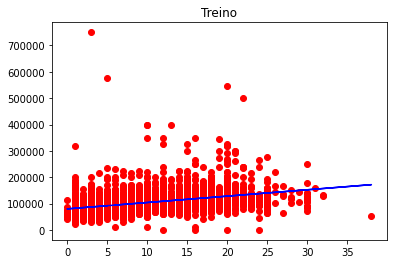

In [128]:
######################################
# Visualizando o treino
######################################

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
plt.title('Treino')
plt.show()

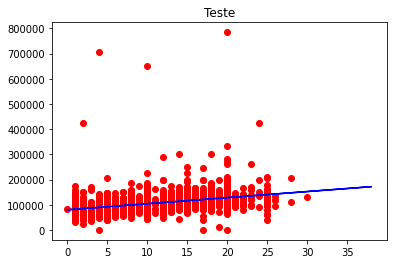

In [129]:
######################################
# Visualizando o teste
######################################

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', scaley=False)
plt.title('Teste')
plt.show()

In [130]:
######################################
# Valor Especifico
######################################

print(regressor.predict([[10]]))

[104042.62845137]


# R^2 - Perfomance do modelo

In [133]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.11482864256085834

Significa que a variavel independente idade tem 11% de influencia sobre o salario.